# Работа с МРТ-изображениями

## Изменение расширения

In [ ]:
from pathlib import Path
from os import listdir

In [ ]:
mypath = ''

In [ ]:
files = [f for f in listdir(mypath)]
for file in files:
  if file[-1] != 'm':
    p = Path(mypath + '/' + file)
    p.rename(p.with_suffix('.dcm'))

## Получение изображений

In [2]:
from pydicom import dcmread
import pydicom
from pydicom.data import get_testdata_file

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
from sklearn import metrics

In [5]:
ds = pydicom.dcmread('Z100.dcm')

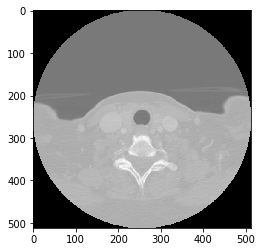

In [ ]:
plt.imshow(ds.pixel_array, cmap='gray', interpolation='nearest')
plt.show()

In [ ]:
scans = []
for scan in listdir(mypath):
  ds = pydicom.dcmread('/content/drive/MyDrive/Магистратура/Диссер/Данные/МРТ/Васильева Тамара Николаевна/' + scan)
  scans.append(ds)

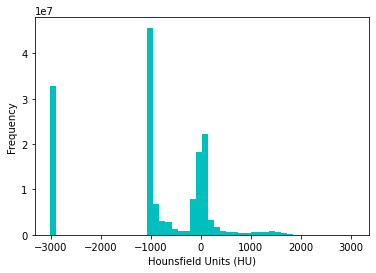

In [ ]:
imgs = get_pixels_hu(scans)
plt.hist(imgs.flatten(), bins=50, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
imgs[0].shape

(512, 512)

In [ ]:
imgs[0].reshape(-1).shape

(262144,)

In [ ]:
imgs = np.array(imgs)
imgs = imgs.reshape(588, -1)
imgs[0].shape

(262144,)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(imgs)

In [ ]:
labels = kmeans_model.labels_

In [ ]:
metrics.silhouette_score(imgs, labels, metric='euclidean')

0.2970203934396275

In [ ]:
all_silhouette_scores = []
for i in list(range(2, 21)):
  kmeans_model = KMeans(n_clusters=i, random_state=1).fit(imgs)
  labels = kmeans_model.labels_
  all_silhouette_scores.append(metrics.silhouette_score(imgs, labels, metric='euclidean'))
  print("Обработана ситуация с {} кластерами".format(str(i)))

Обработана ситуация с 2 кластерами
Обработана ситуация с 3 кластерами
Обработана ситуация с 4 кластерами
Обработана ситуация с 5 кластерами
Обработана ситуация с 6 кластерами
Обработана ситуация с 7 кластерами
Обработана ситуация с 8 кластерами
Обработана ситуация с 9 кластерами
Обработана ситуация с 10 кластерами
Обработана ситуация с 11 кластерами
Обработана ситуация с 12 кластерами
Обработана ситуация с 13 кластерами
Обработана ситуация с 14 кластерами
Обработана ситуация с 15 кластерами
Обработана ситуация с 16 кластерами
Обработана ситуация с 17 кластерами
Обработана ситуация с 18 кластерами
Обработана ситуация с 19 кластерами
Обработана ситуация с 20 кластерами


In [ ]:
all_silhouette_scores

[0.2619918428840069,
 0.2970203934396275,
 0.2776482812877485,
 0.28847794438037927,
 0.3029154496765255,
 0.31049793882312565,
 0.3040002849557372,
 0.3073136761879912,
 0.31747846830343573,
 0.30950811729370004,
 0.3231182041319519,
 0.3082982118241184,
 0.3182465993325512,
 0.323591428737234,
 0.32147256056918655,
 0.32517021940891755,
 0.32475598097908004,
 0.32451257390263216,
 0.32840729282100256]

In [ ]:
import plotly.express as px

In [ ]:
all_silhouette_scores = [0.2619918428840069, 0.2970203934396275, 0.2776482812877485,
 0.28847794438037927,
 0.3029154496765255,
 0.31049793882312565,
 0.3040002849557372,
 0.3073136761879912,
 0.31747846830343573,
 0.30950811729370004,
 0.3231182041319519,
 0.3082982118241184,
 0.3182465993325512,
 0.323591428737234,
 0.32147256056918655,
 0.32517021940891755,
 0.32475598097908004,
 0.32451257390263216,
 0.32840729282100256]

In [ ]:
import numpy as np
np.arange(2, 21)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])

In [ ]:
fig = px.line(x=np.arange(2, 21), y=all_silhouette_scores, markers=True)
fig.update_layout(
    xaxis_title="Number of clusters", yaxis_title="Silhouette Score"
)
fig.show()

In [ ]:
from sklearn.cluster import AffinityPropagation

In [ ]:
af = AffinityPropagation(random_state=1, max_iter=200).fit(imgs)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(imgs, labels, metric="euclidean")
)


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [ ]:
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose

In [ ]:
from keras.optimizers import Adam

In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


In [ ]:
inputs = Input((512, 512, 1))
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

model = Model(inputs=[inputs], outputs=[conv10])

model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss, metrics=[dice_coef])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_38 (Conv2D)             (None, 512, 512, 32  320         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_39 (Conv2D)             (None, 512, 512, 32  9248        ['conv2d_38[0][0]']              
                                )                                                           

In [ ]:
model = VGG16(weights='imagenet', include_top=False, input_shape=(512,512, 3))
img_data = preprocess_input(imgs)
vgg16_feature = model.predict(img_data)

ValueError: ignored

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

# Работа с жалобами 

In [ ]:
pip install python-docx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from docx import Document

In [ ]:
mypath = ''

In [ ]:
doc = Document(mypath + 'хемодектома.docx')

In [ ]:
texts = []

In [ ]:
doc.paragraphs[25].text.lower()

'20.06.2022 12:30 : первичный осмотр совместно с зав. 5 х.о. светликовым а.в..\nпри поступлении предъявляет жалобы на ощущение дискомфорта в области образования боковой поверхности шеи справа, боли сдавливающего характера при изменении положения головы, периодический кашель . \nанамнез. со слов пациентки впервые образование в области шеи было обнаружено в 2011 году, когда пациентка проходила лечение по причине наличие параганглиом в области среднего уха. было сделано мрт головы, шеи, по результатам которого в области бифуркации правой общей сонной артерии было обнаружено опухолевое образование диаметром до 3 см. в течение длительного времени каких-либо жалоб из-за имеющегося образования не имела. появление клинических симптомов в виде роста образования, появление дискомфорта при повороте головы, болей давящего характера стала отмечать в течение последних нескольких месяцев. по данным мскт -ангиографии головы, шеи от 28.03.22: определяется справа краниально по ходу вса и нса гиперваскул

In [ ]:
for file in listdir(mypath):
  doc = Document(mypath + file)
  for par in doc.paragraphs:
    if 'жалобы'in par.text.lower():
      texts.append(par.text)

In [ ]:
len(texts)

4

In [ ]:
texts

['20.06.2022 12:30 : Первичный осмотр совместно с зав. 5 х.о. Светликовым А.В..\nПри поступлении предъявляет жалобы на ощущение дискомфорта в области образования боковой поверхности шеи справа, боли сдавливающего характера при изменении положения головы, периодический кашель . \nАнамнез. Со слов пациентки впервые образование в области шеи было обнаружено в 2011 году, когда пациентка проходила лечение по причине наличие параганглиом в области среднего уха. Было сделано МРТ головы, шеи, по результатам которого в области бифуркации правой общей сонной артерии было обнаружено опухолевое образование диаметром до 3 см. В течение длительного времени каких-либо жалоб из-за имеющегося образования не имела. Появление клинических симптомов в виде роста образования, появление дискомфорта при повороте головы, болей давящего характера стала отмечать в течение последних нескольких месяцев. По данным МСКТ -ангиографии головы, шеи от 28.03.22: определяется справа краниально по ходу ВСА и НСА гиперваску

In [ ]:
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import gensim
from gensim.utils import simple_preprocess

/usr/local/lib/python3.8/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True убирает пунктуацию

In [ ]:
texts = list(sent_to_words(texts))

In [ ]:
texts

[['первичныи',
  'осмотр',
  'совместно',
  'зав',
  'светликовым',
  'при',
  'поступлении',
  'предъявляет',
  'жалобы',
  'на',
  'ощущение',
  'дискомфорта',
  'области',
  'образования',
  'боковои',
  'поверхности',
  'шеи',
  'справа',
  'боли',
  'сдавливающего',
  'характера',
  'при',
  'изменении',
  'положения',
  'головы',
  'периодическии',
  'кашель',
  'анамнез',
  'со',
  'слов',
  'пациентки',
  'впервые',
  'образование',
  'области',
  'шеи',
  'было',
  'обнаружено',
  'году',
  'когда',
  'пациентка',
  'проходила',
  'лечение',
  'по',
  'причине',
  'наличие',
  'параганглиом',
  'области',
  'среднего',
  'уха',
  'было',
  'сделано',
  'мрт',
  'головы',
  'шеи',
  'по',
  'результатам',
  'которого',
  'области',
  'бифуркации',
  'правои',
  'общеи',
  'соннои',
  'артерии',
  'было',
  'обнаружено',
  'опухолевое',
  'образование',
  'диаметром',
  'до',
  'см',
  'течение',
  'длительного',
  'времени',
  'каких',
  'либо',
  'жалоб',
  'из',
  'за',
  'им

In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [ ]:
texts = remove_stopwords(texts)

In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()

/usr/local/lib/python3.8/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.8/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.8/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.8/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.g

In [ ]:
def lemmatization(texts):
  lemmatized = [[pymorphy2_analyzer.parse(word)[0].normal_form for word in doc] for doc in texts]
  return lemmatized
data_words_lemmatized = lemmatization(texts)

In [ ]:
import gensim.corpora as corpora

In [ ]:
id2word = corpora.Dictionary(data_words_lemmatized)
corpus = [id2word.doc2bow(text) for text in data_words_lemmatized]

In [ ]:
! pip install pyLDAvis==3.2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                id2word=id2word,
                                num_topics=10,
                                passes = 50)

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [ ]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds='tsne')

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


In [ ]:
pyLDAvis.display(vis)

In [ ]:
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union

In [ ]:
data_words_lemmatized[0]

['первичный',
 'осмотр',
 'совместно',
 'зав',
 'светликов',
 'поступление',
 'предъявлять',
 'жалоба',
 'ощущение',
 'дискомфорт',
 'область',
 'образование',
 'боков',
 'поверхность',
 'шея',
 'справа',
 'боль',
 'сдавливать',
 'характер',
 'изменение',
 'положение',
 'голова',
 'периодический',
 'кашель',
 'анамнез',
 'слово',
 'пациентка',
 'впервые',
 'образование',
 'область',
 'шея',
 'обнаружить',
 'год',
 'пациентка',
 'проходить',
 'лечение',
 'причина',
 'наличие',
 'параганглиома',
 'область',
 'среднее',
 'ухо',
 'сделать',
 'мрт',
 'голова',
 'шея',
 'результат',
 'который',
 'область',
 'бифуркация',
 'правый',
 'общий',
 'сонный',
 'артерия',
 'обнаружить',
 'опухолевый',
 'образование',
 'диаметр',
 'смотреть',
 'течение',
 'длительный',
 'время',
 'какой',
 'либо',
 'жалоба',
 'иметься',
 'образование',
 'иметь',
 'появление',
 'клинический',
 'симптом',
 'вид',
 'рост',
 'образование',
 'появление',
 'дискомфорт',
 'поворот',
 'голова',
 'боль',
 'давящий',
 'характе

In [ ]:
jaccard_similarity(data_words_lemmatized[0], data_words_lemmatized[1])

0.09363295880149813

In [ ]:
jaccard_similarity(data_words_lemmatized[0], data_words_lemmatized[1])

0.09363295880149813

In [ ]:
jaccard_similarity(data_words_lemmatized[0], data_words_lemmatized[2])

0.09482758620689655

In [ ]:
jaccard_similarity(data_words_lemmatized[1], data_words_lemmatized[2])

0.6374269005847953

In [ ]:
jaccard_similarity(data_words_lemmatized[0], data_words_lemmatized[3])

0.12796208530805686

In [ ]:
jaccard_similarity(data_words_lemmatized[1], data_words_lemmatized[3])

0.06451612903225806

In [ ]:
jaccard_similarity(data_words_lemmatized[2], data_words_lemmatized[3])

0.0660377358490566